<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [87]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [88]:
# Reading Netflix CSV file
netflix_df = pd.read_csv("netflix_data.csv")

In [89]:
# Filtering for movies released in the 1990s
movies_1990s = netflix_df[(netflix_df["type"] == "Movie") & (netflix_df["release_year"].between(1990, 1999))]

# Duration Trends

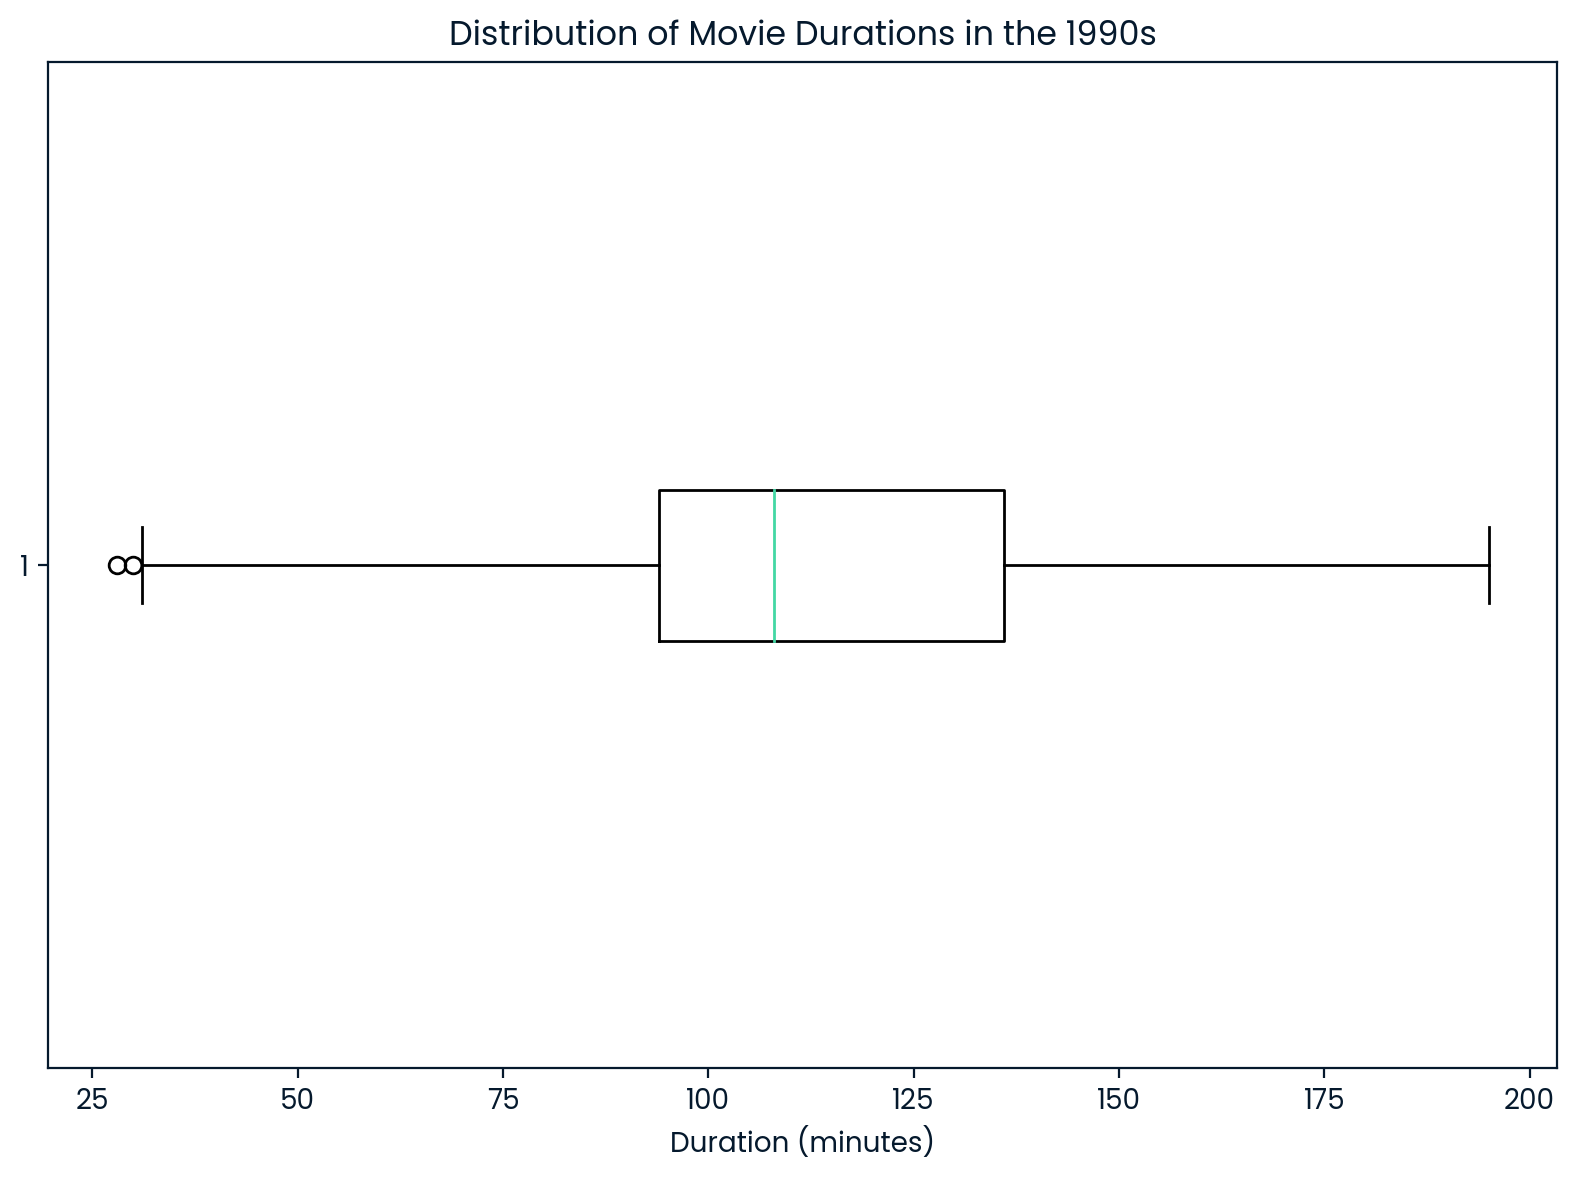

In [90]:
# Plotting a box plot to visualize duration trends
plt.figure(figsize=(8, 6))
plt.boxplot(movies_1990s['duration'], vert=False)
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.tight_layout()
plt.show()

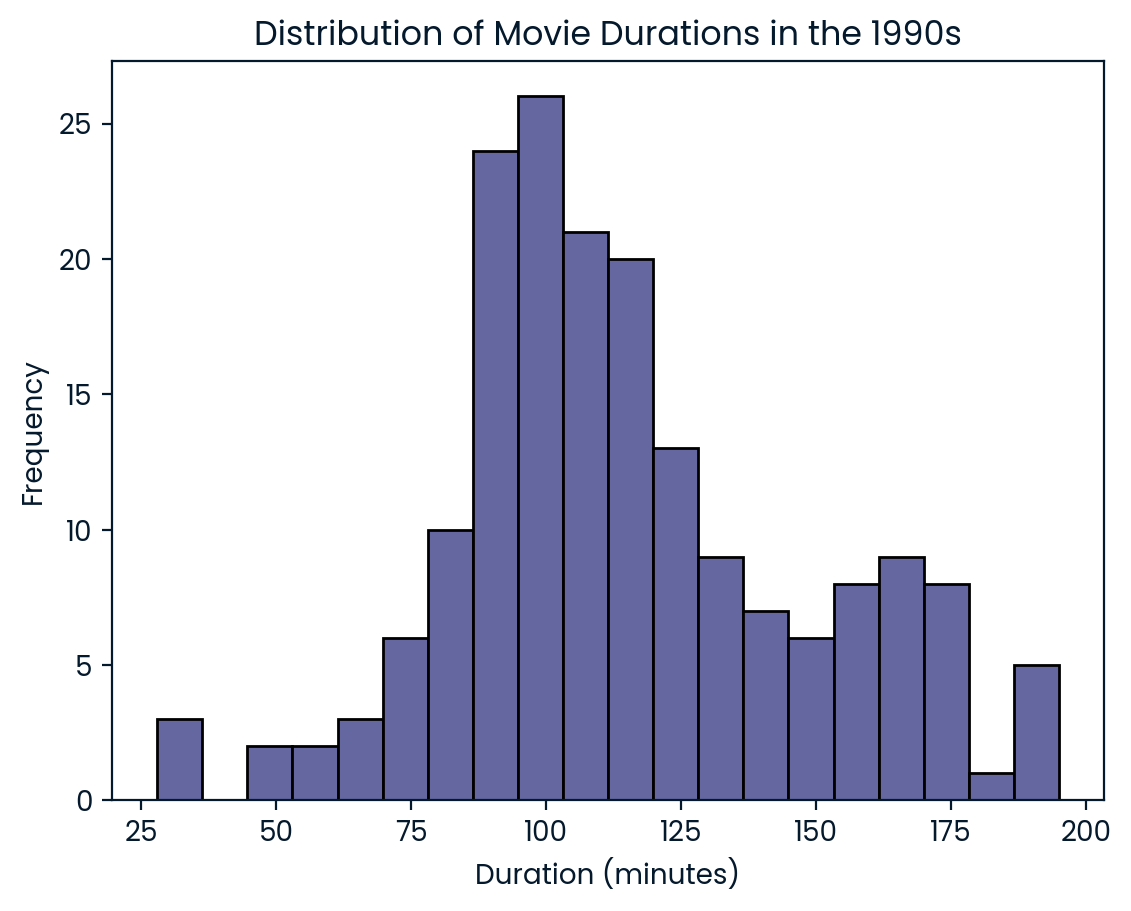

In [91]:
# Plotting histogram to visualize duration distribution
plt.hist(movies_1990s["duration"], bins=20, edgecolor='black')
plt.title('Distribution of Movie Durations in the 1990s')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

In [92]:
# Finding the most frequent duration
duration = int(movies_1990s["duration"].mode())  # mode() returns the most common value
print("Most frequent movie duration in the 1990s:", duration)

Most frequent movie duration in the 1990s: 94


# Short Action Movies

In [93]:
# Filtering for short action movies in the 1990s
short_action_movies_1990s = movies_1990s[(movies_1990s["duration"] < 90) & (movies_1990s["genre"].str.contains("Action"))]

In [94]:
# Counting the number of short action movies
short_movie_count = len(short_action_movies_1990s)
print("Number of short action movies released in the 1990s:", short_movie_count)

Number of short action movies released in the 1990s: 7


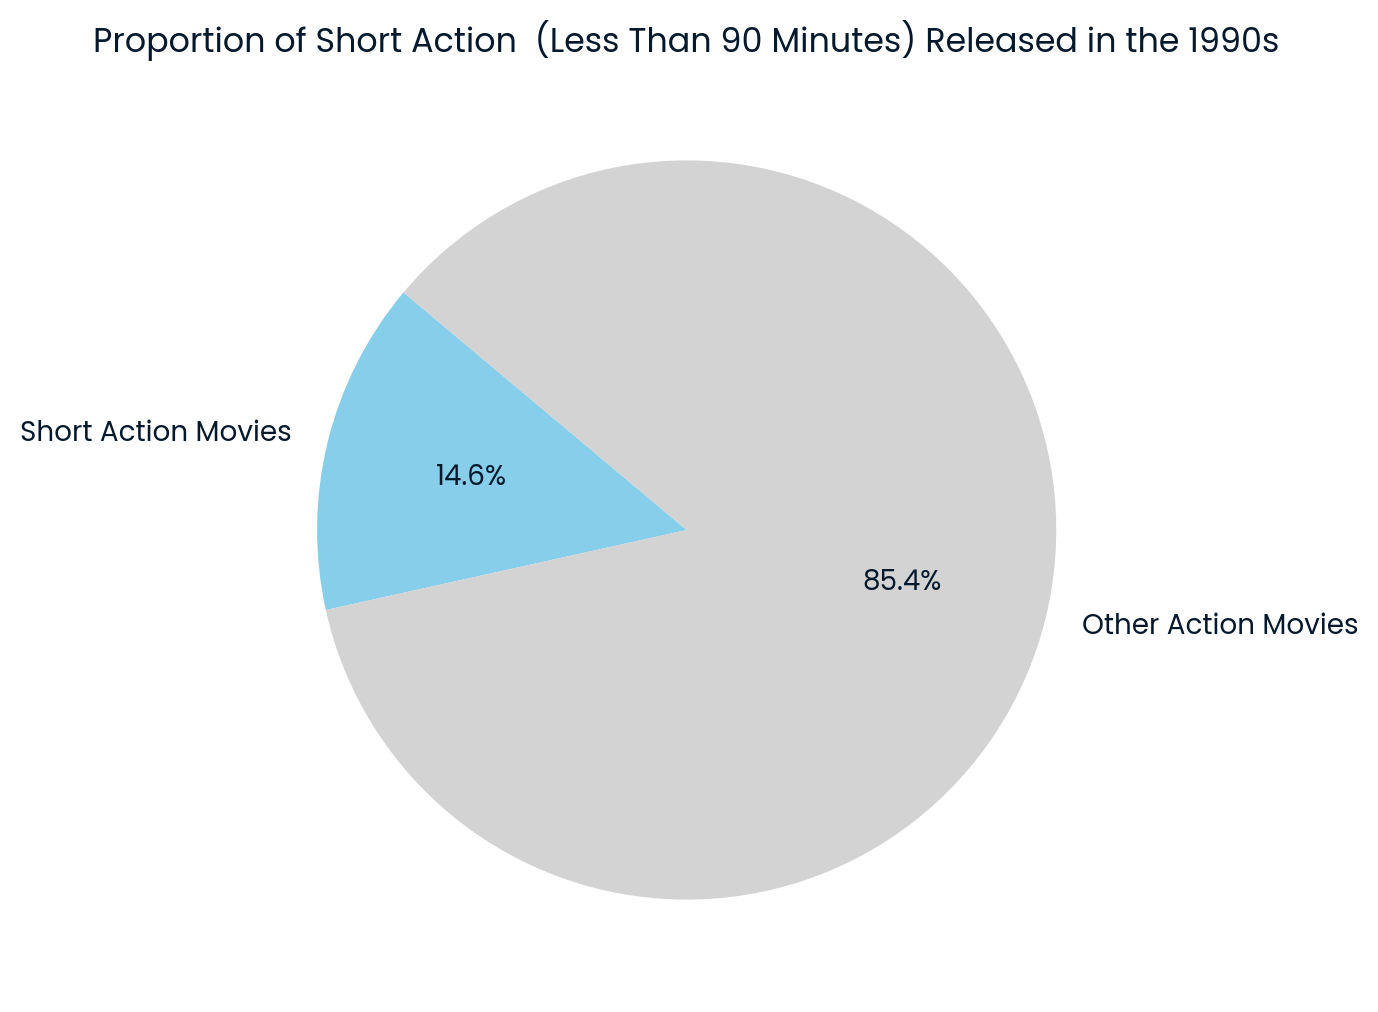

In [95]:
# Plotting a pie chart for proportion of short action movies
total_action_movies_1990s = movies_1990s[(movies_1990s["genre"].str.contains("Action"))] 
action_movie_count = len(total_action_movies_1990s)
short_action_percentage = (short_movie_count / action_movie_count) * 100

labels = ['Short Action Movies', 'Other Action Movies']
sizes = [short_movie_count, action_movie_count - short_movie_count]
colors = ['skyblue', 'lightgray']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Short Action  (Less Than 90 Minutes) Released in the 1990s')
plt.show()


# Genre Distribution

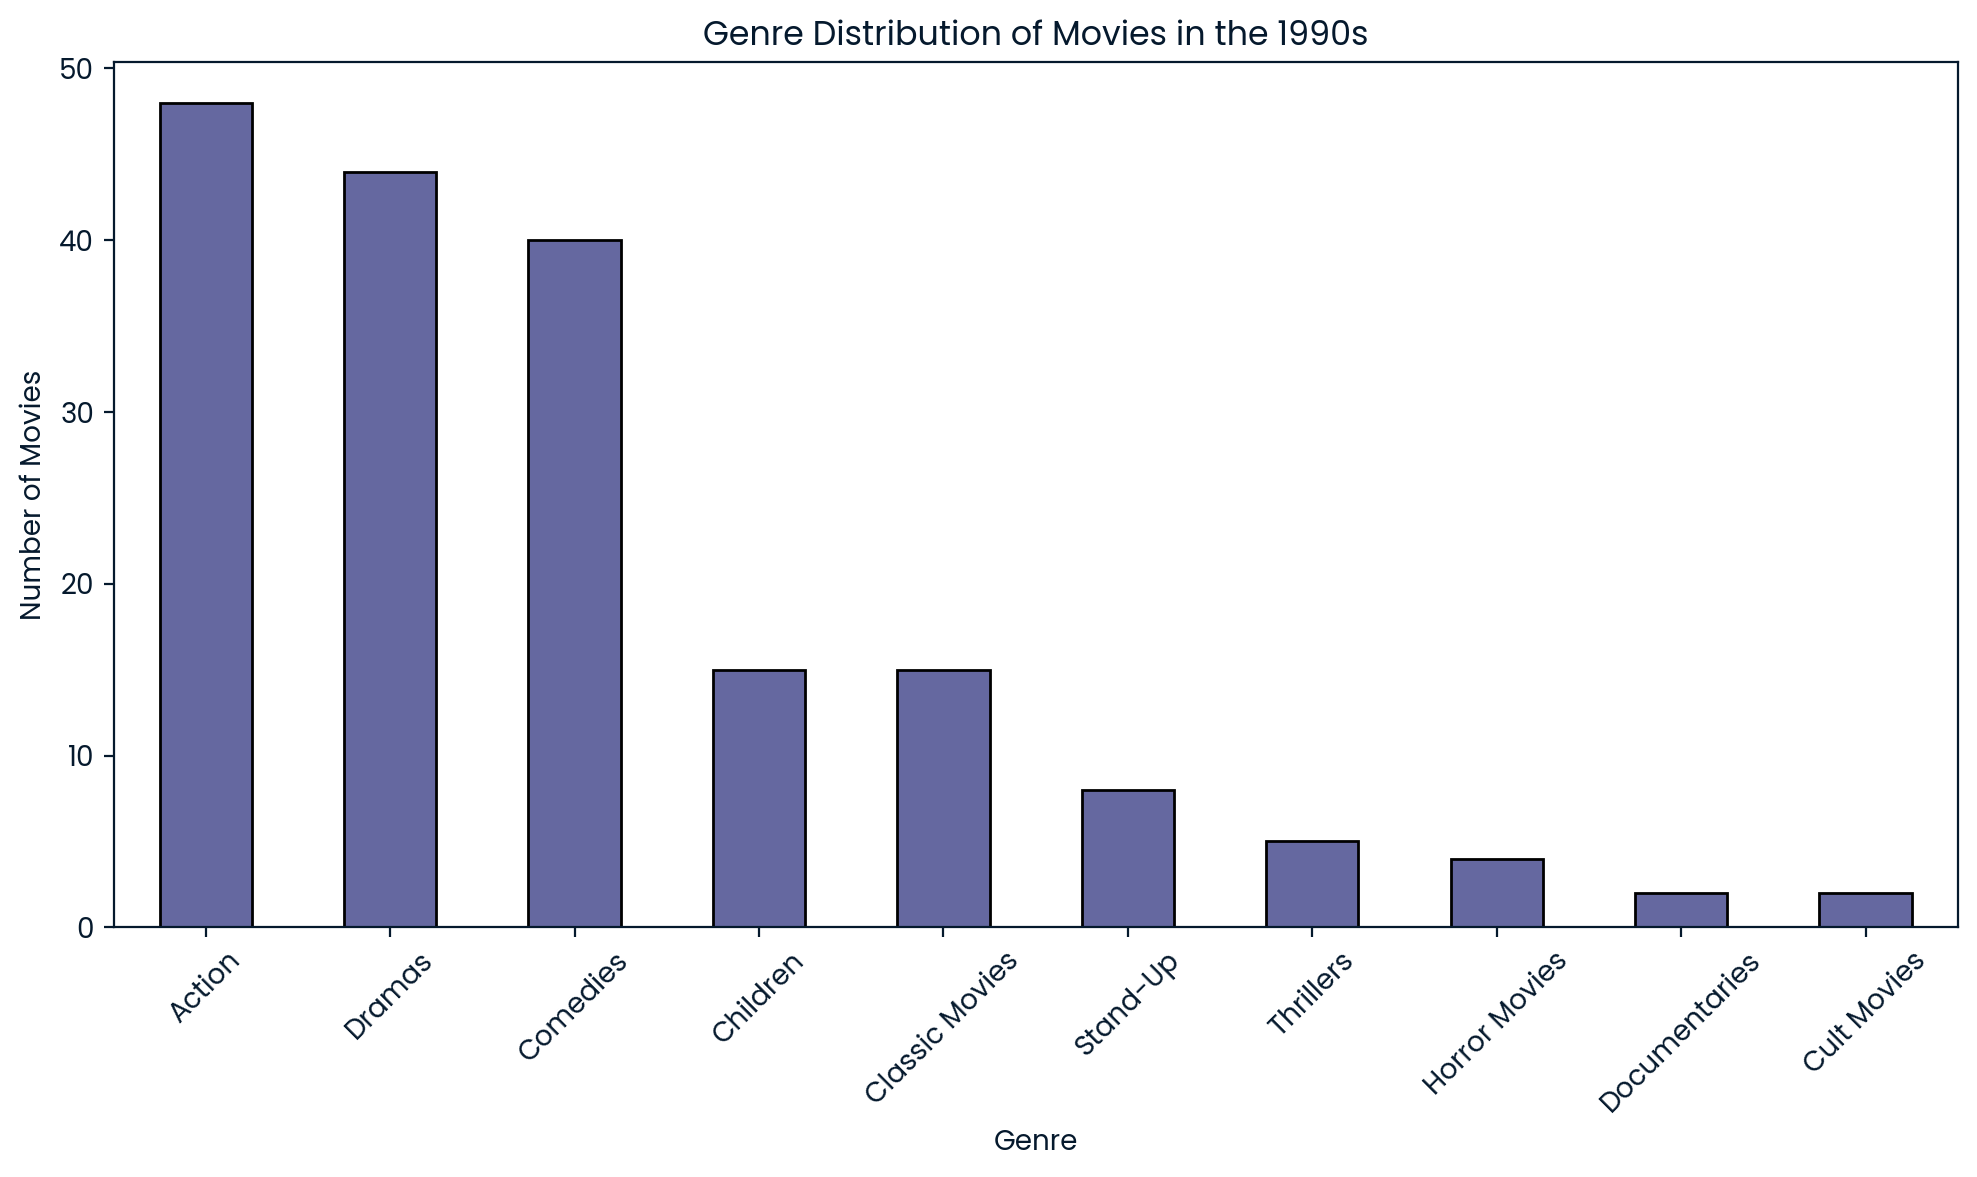

In [96]:
# Counting movies by genre in the 1990s
genre_counts = movies_1990s['genre'].value_counts()

# Plotting a bar chart for genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', edgecolor='black')
plt.title('Genre Distribution of Movies in the 1990s')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Director Analysis

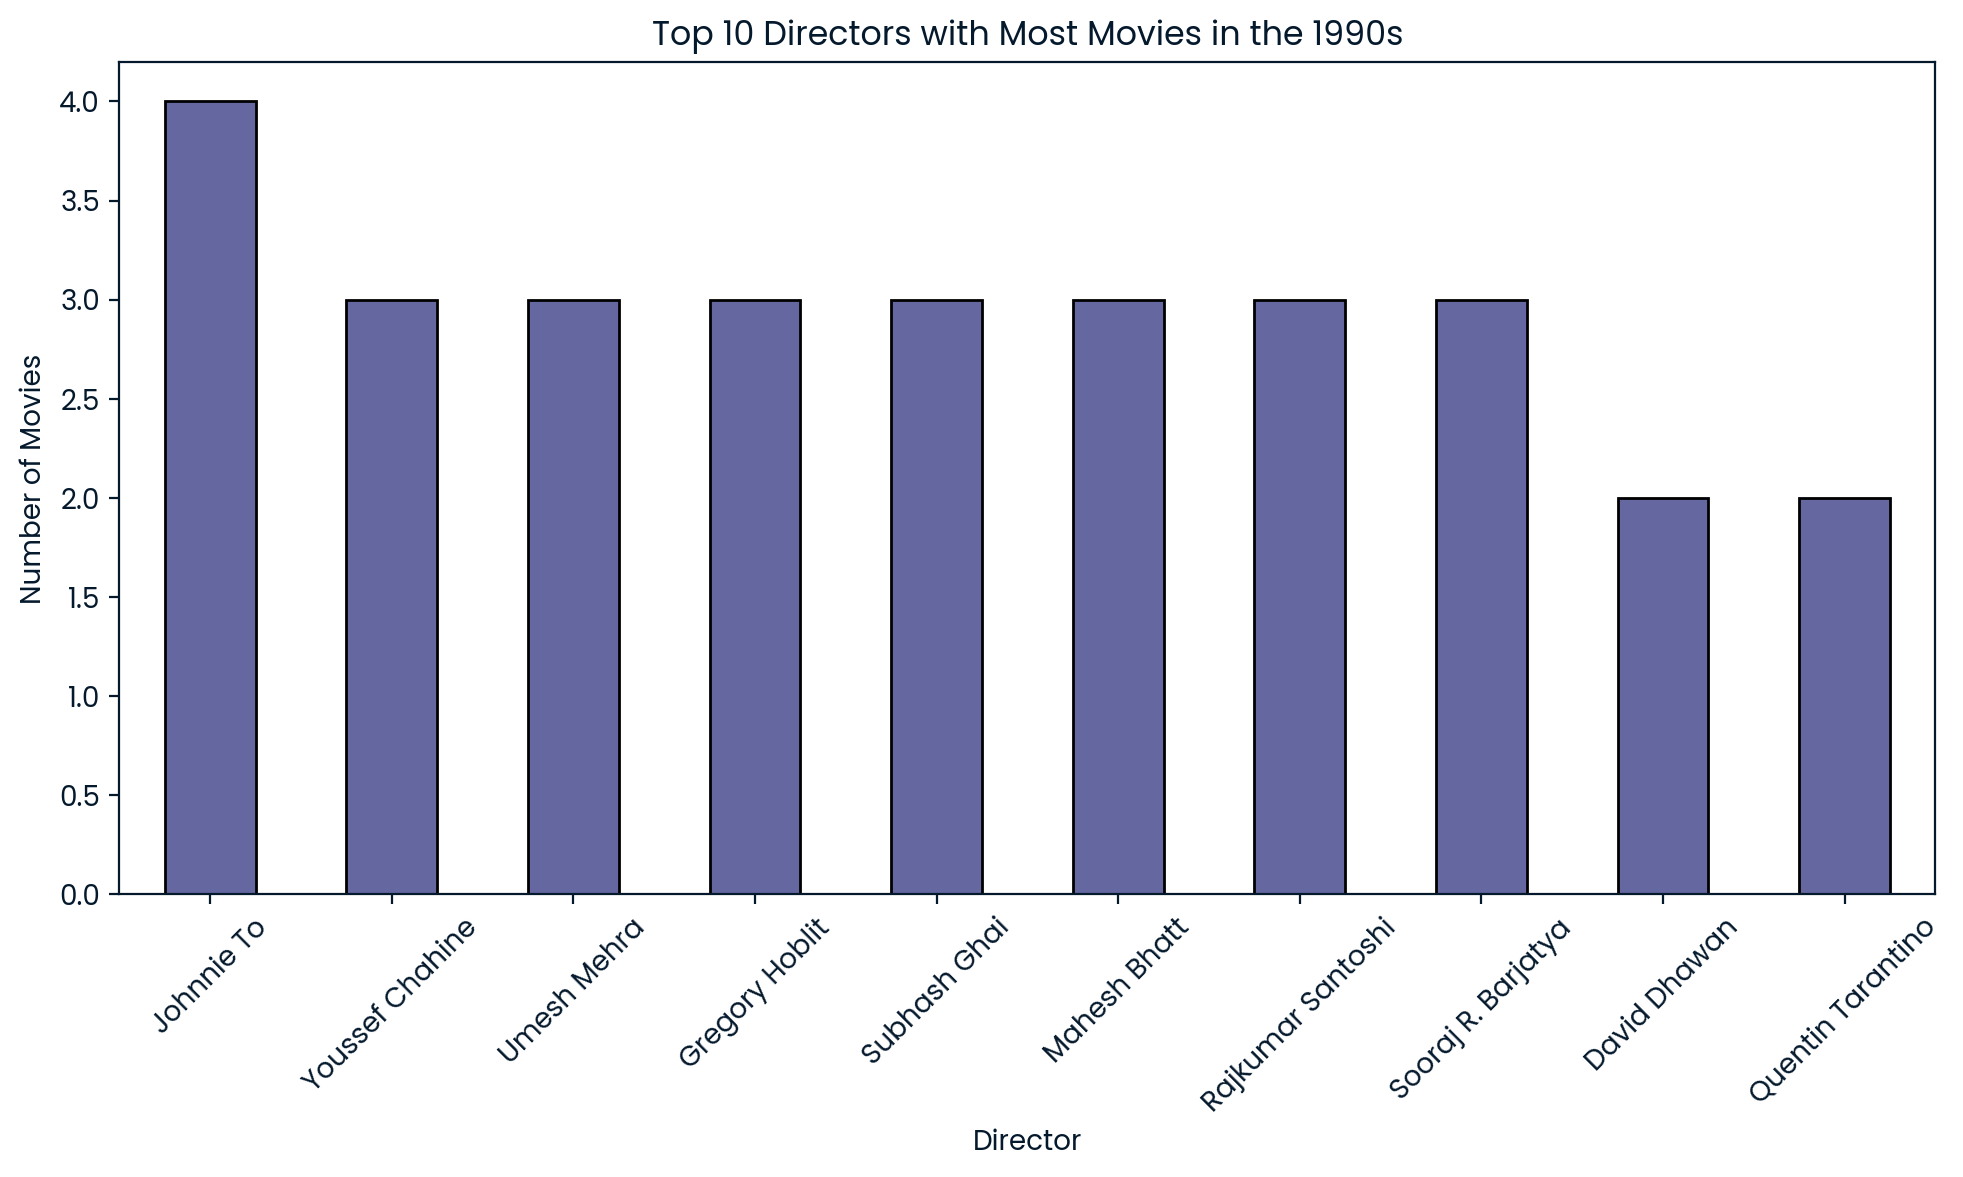

In [97]:
# Counting movies per director in the 1990s
director_counts = movies_1990s['director'].value_counts().head(10)

# Plotting a bar chart for top directors
plt.figure(figsize=(10, 6))
director_counts.plot(kind='bar', edgecolor='black')
plt.title('Top 10 Directors with Most Movies in the 1990s')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Country of Origin

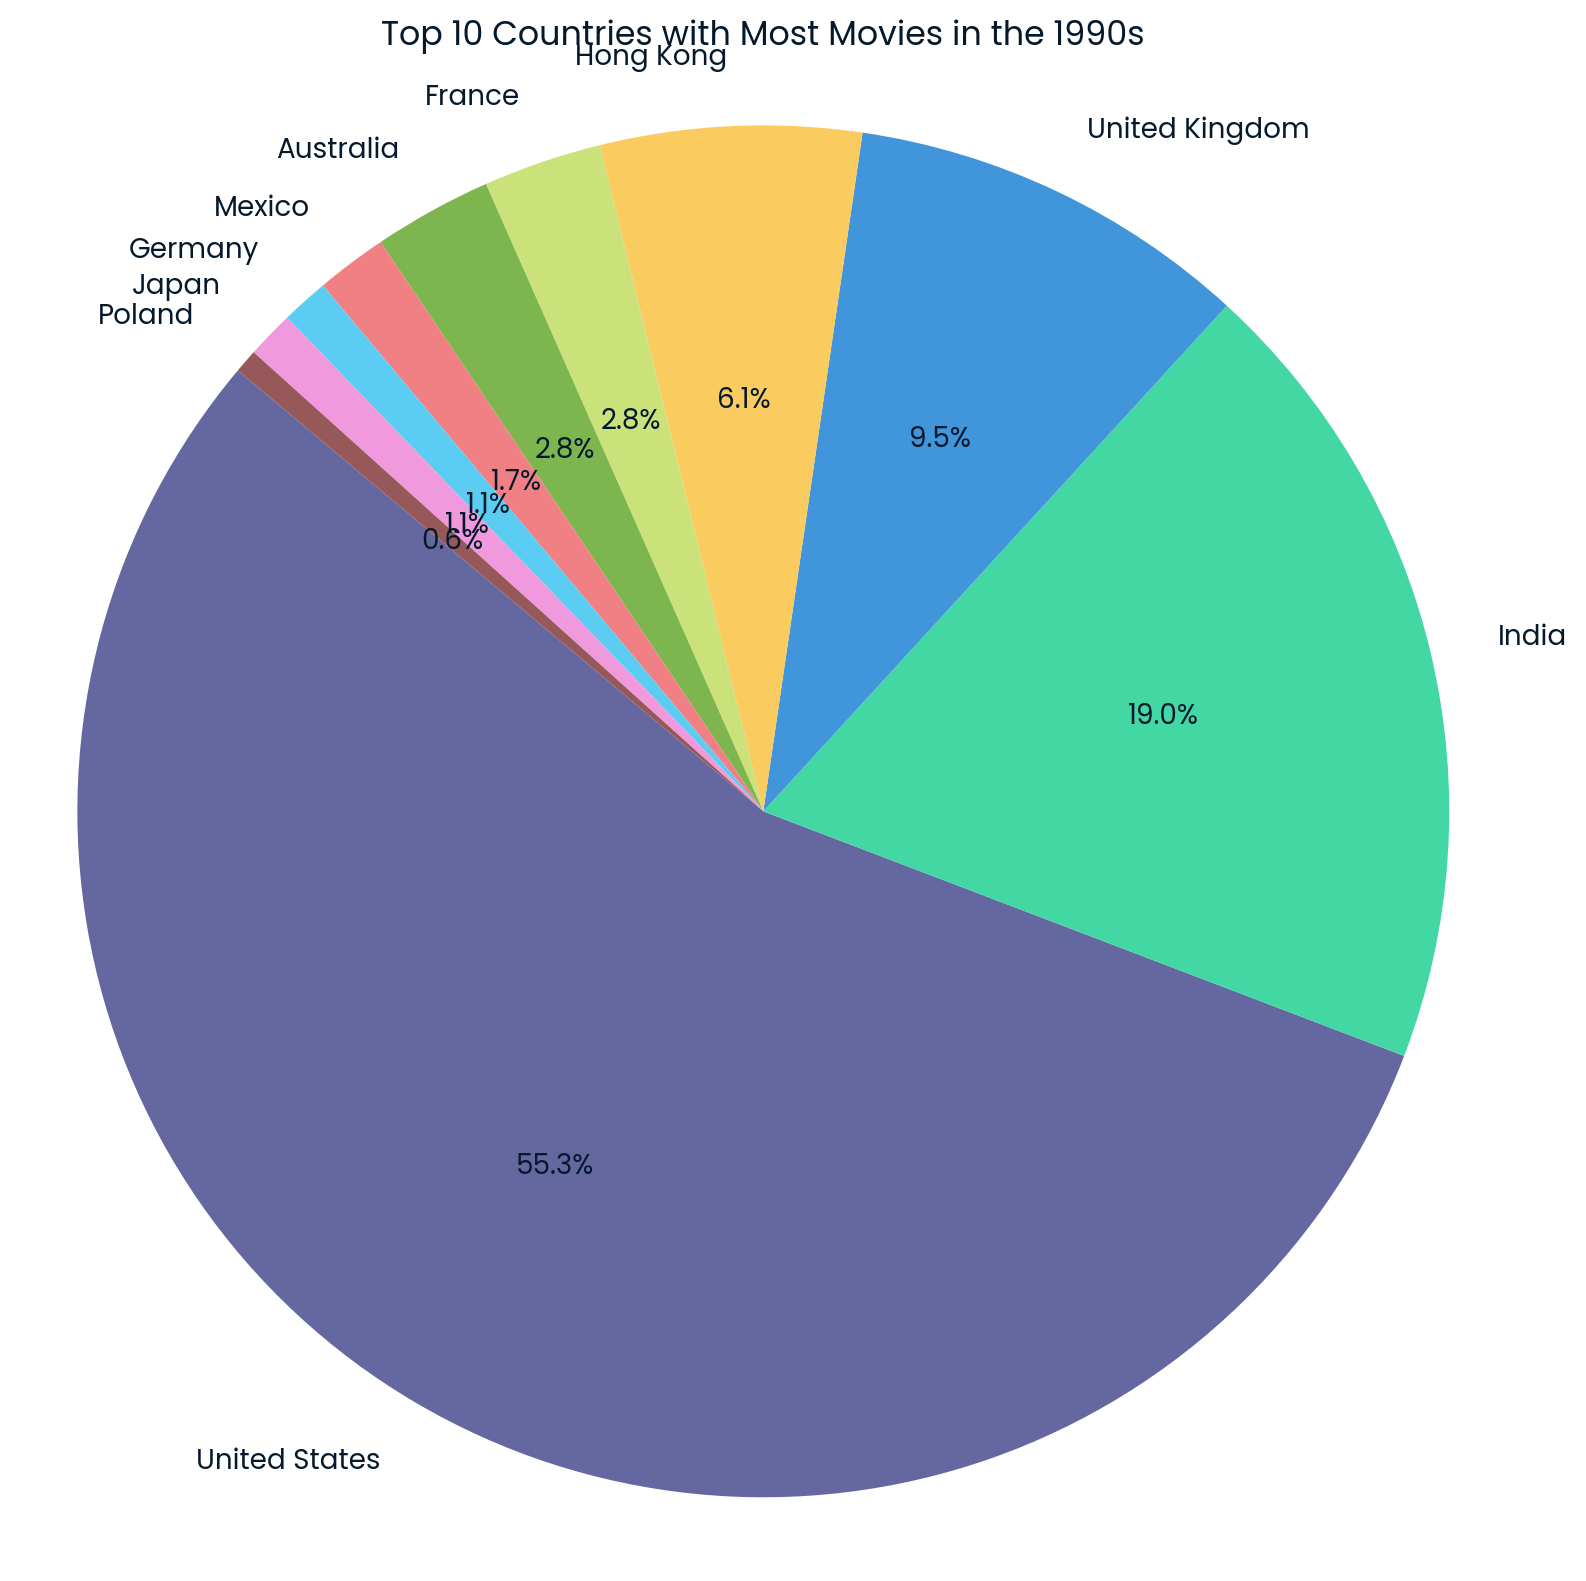

In [98]:
# Counting movies by country of origin in the 1990s
country_counts = movies_1990s['country'].value_counts().head(10)

# Plotting a pie chart for country distribution
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries with Most Movies in the 1990s')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Top Actors

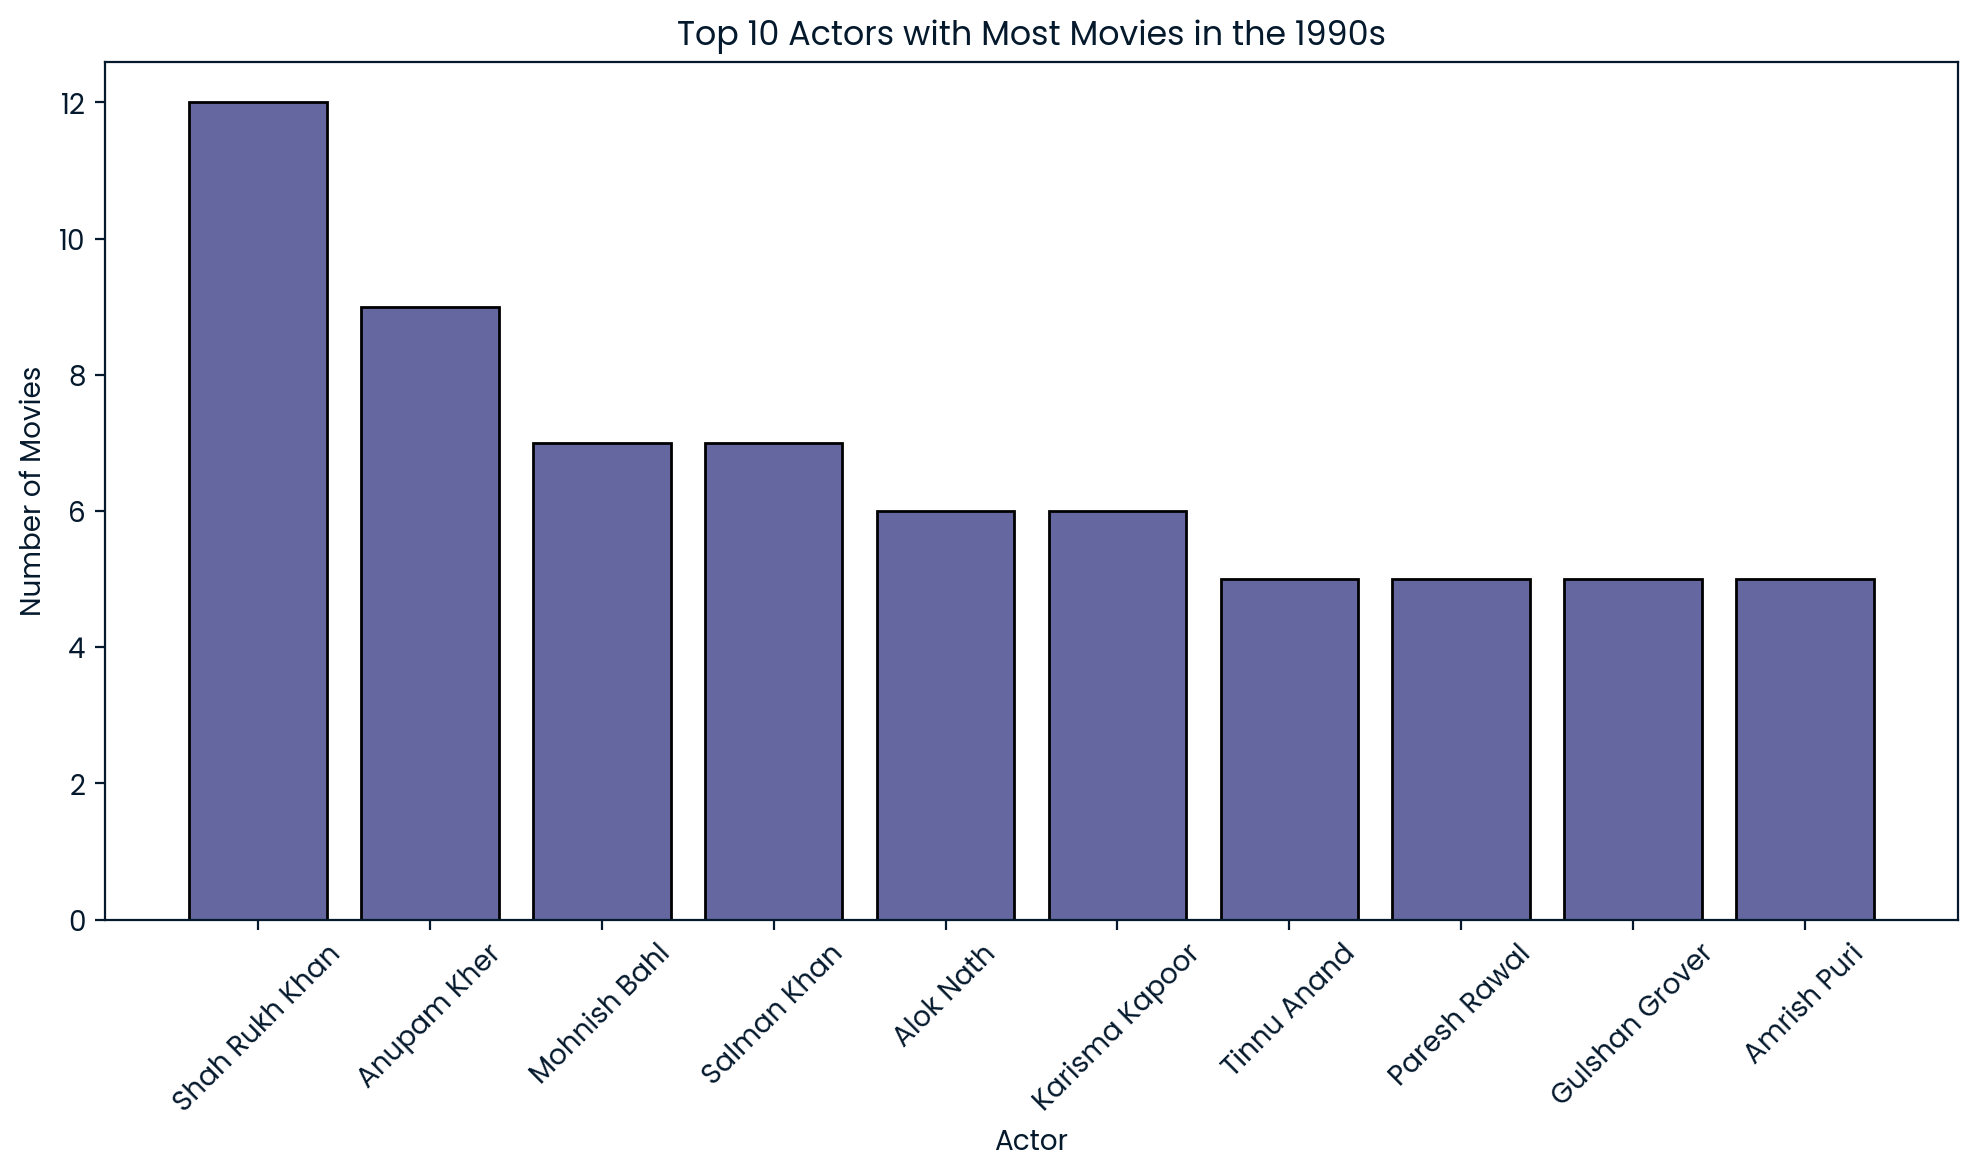

In [99]:
from collections import Counter

# Creating a list of all actors
all_actors = [actor for actors in movies_1990s['cast'].str.split(', ').dropna() for actor in actors]

# Counting occurrences of each actor
actor_counts = dict(Counter(all_actors).most_common(10))

# Plotting a bar chart for top actors
plt.figure(figsize=(10, 6))
plt.bar(actor_counts.keys(), actor_counts.values(), edgecolor='black')
plt.title('Top 10 Actors with Most Movies in the 1990s')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Release Pattern Over Years

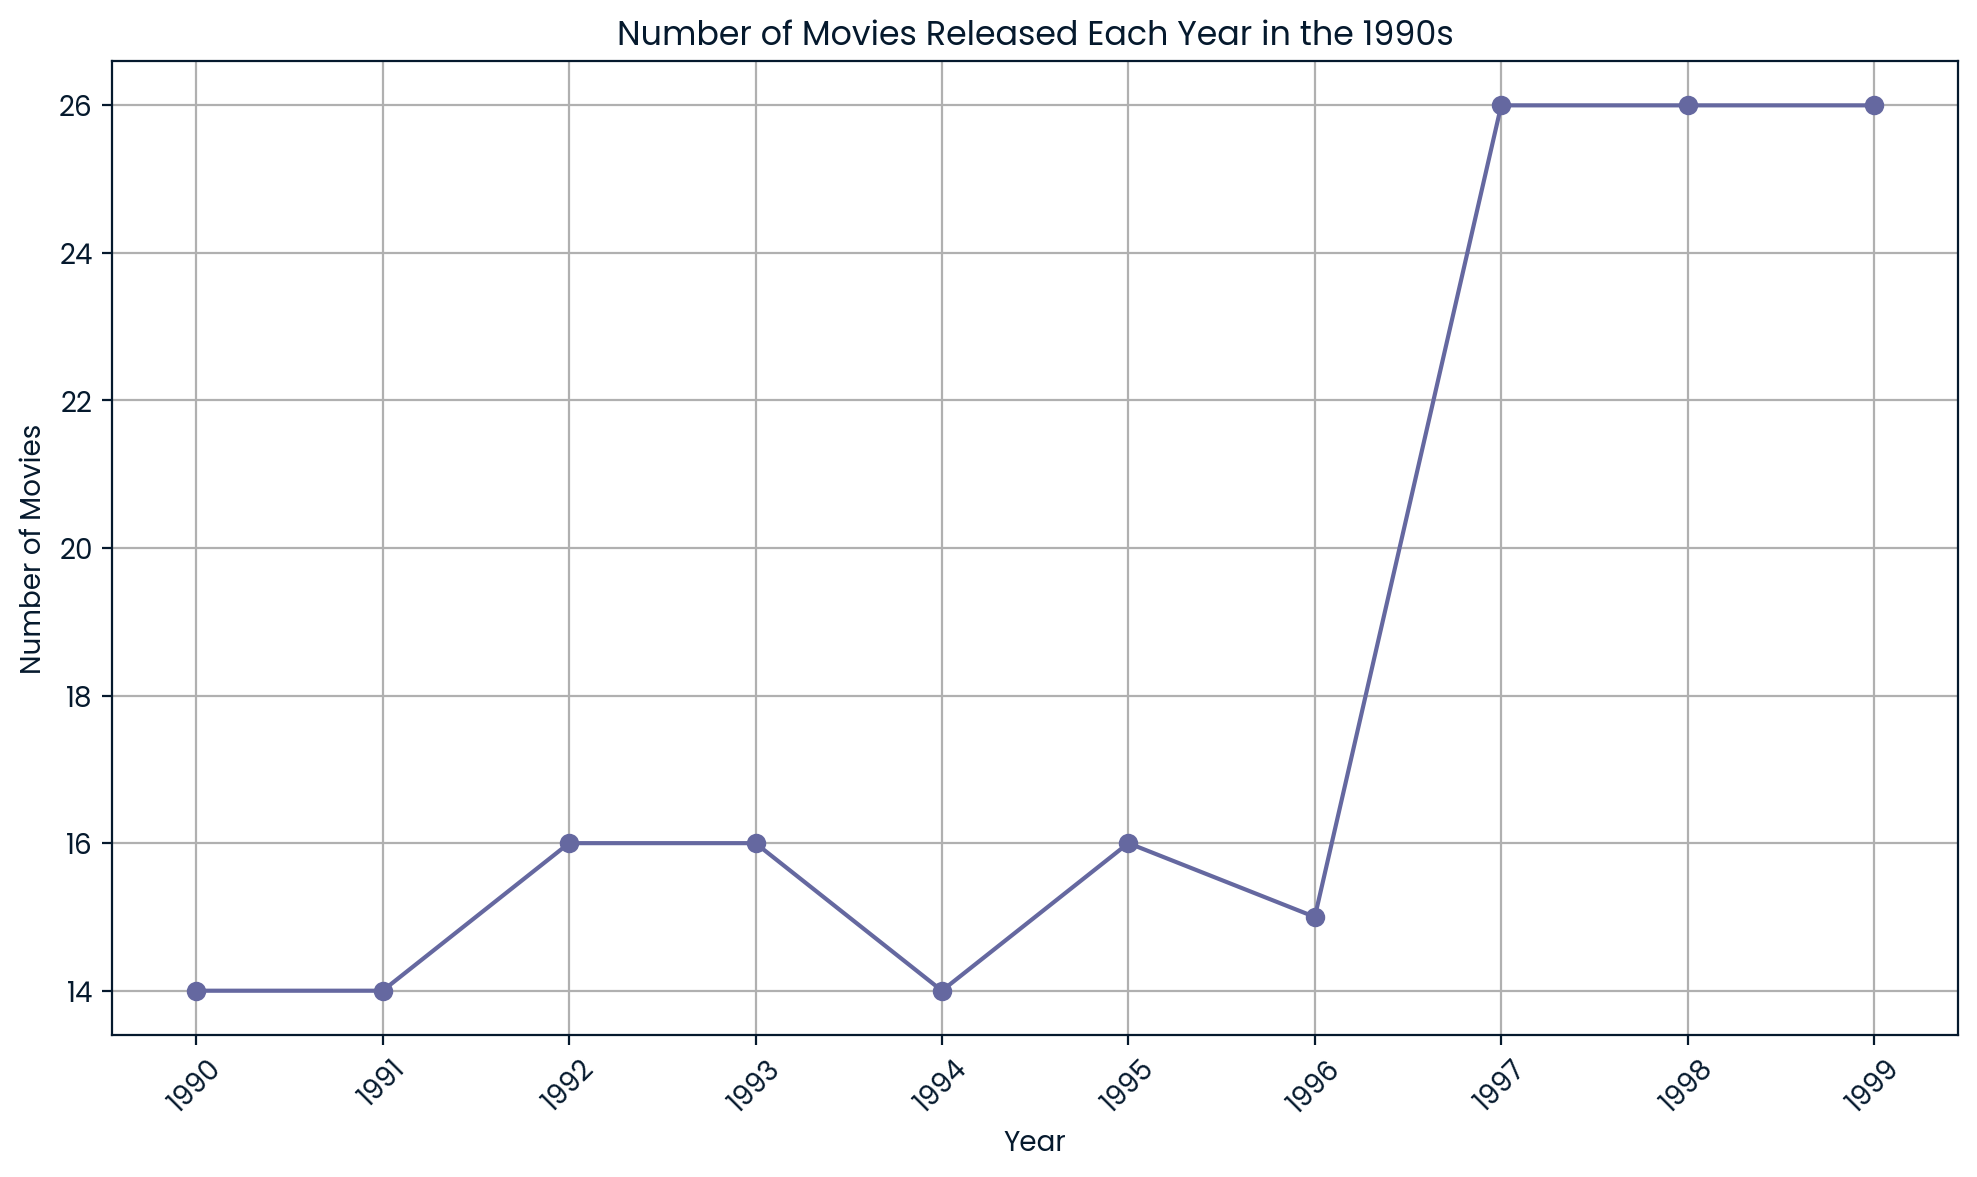

In [100]:
# Counting movies released each year in the 1990s
year_counts = movies_1990s['release_year'].value_counts().sort_index()

# Plotting a line chart for release pattern
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.title('Number of Movies Released Each Year in the 1990s')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(year_counts.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
